# 1. Project Overview

This project analyzes fuel prices in Brazil using data from the National Agency of Petroleum (ANP). It investigates regional and temporal patterns and applies machine learning models to support strategic decision-making.

The goal is to identify fuel price trends and disparities across states and regions and to build models that can help forecast fuel prices over time.


# 2. Problem Definition

Fuel prices in Brazil vary by region and over time due to logistics, taxes, and market conditions. This project aims to identify patterns and use machine learning to support price forecasting and strategic planning.

Key questions:
- Which regions have higher or lower prices?
- Are there seasonal price patterns?
- Which models can predict fuel prices effectively?


# 3. Project Plan and Timeline

The project is divided into key phases:
- Data exploration and cleaning
- Feature engineering and preprocessing
- Model training and evaluation
- Strategic insights and recommendations

Each step includes visualizations, tests, and documentation to support reproducibility and analysis.

# 4. Load and Inspect Dataset

In [58]:
# Libraries

# Data exploration
import pandas as pd
import numpy as np

# To create graphics
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

# Machine Learning preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Train/test data splitting
from sklearn.model_selection import train_test_split

# Handle class imbalance
from sklearn.utils import class_weight

# Random operations
import random

# Deep Learning framework
import tensorflow as tf

# Format numerical outputs
pd.options.display.float_format = '{:.2f}'.format


In [59]:
# Load the dataset
df = pd.read_excel("Gas_prices_Brazil.xlsx")

# Display basic information
display("Shape of the dataset:", df.shape)
display("\nData types and non-null counts:")
display(df.info())


'Shape of the dataset:'

(58188, 17)

'\nData types and non-null counts:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58188 entries, 0 to 58187
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   START DATE                       58188 non-null  datetime64[ns]
 1   REGION                           58188 non-null  object        
 2   STATE                            58188 non-null  object        
 3   PRODUCT                          58188 non-null  object        
 4   NUMBER OF STATIONS SURVEYED      58188 non-null  int64         
 5   UNIT OF MEASUREMENT              58188 non-null  object        
 6   AVERAGE RESALE PRICE             58188 non-null  float64       
 7   STANDARD DEVIATION RESALE        58188 non-null  float64       
 8   MINIMUM RESALE PRICE             58188 non-null  float64       
 9   MAXIMUM RESALE PRICE             58188 non-null  float64       
 10  AVERAGE RESALE MARGIN            58188 non-null  float64  

None

# 4. Dataset Description

The dataset contains monthly fuel price data across all Brazilian states and regions. It includes:

- Date and location (region, state)
- Fuel type and unit
- Resale and distribution prices (avg, min, max)
- Number of stations surveyed
- Price margins and coefficients

The data supports both temporal and regional analysis.

In [29]:
# Preview the first 5 rows
df.head()

,START DATE,REGION,STATE,PRODUCT,NUMBER OF STATIONS SURVEYED,UNIT OF MEASUREMENT,AVERAGE RESALE PRICE,STANDARD DEVIATION RESALE,MINIMUM RESALE PRICE,MAXIMUM RESALE PRICE,AVERAGE RESALE MARGIN,RESALE COEFFICIENT OF VARIATION,AVERAGE PRICE DISTRIBUTION,STANDARD DEVIATION DISTRIBUTION,MINIMUM PRICE DISTRIBUTION,MAXIMUM PRICE DISTRIBUTION,COEF OF VARIATION DISTRIBUTION
0,2018-01-07,WEST CENTER,DISTRITO FEDERAL,HYDRATED ETHANOL,39,R$/l,3.43,0.13,3.20,3.60,0.27,0.04,3.17,0.06,3.07,3.26,0.02
1,2018-01-07,WEST CENTER,GOIAS,HYDRATED ETHANOL,234,R$/l,2.96,0.14,2.75,3.39,0.41,0.05,2.55,0.16,2.37,3.05,0.06
2,2018-01-07,WEST CENTER,MATO GROSSO,HYDRATED ETHANOL,156,R$/l,2.55,0.16,2.25,3.09,0.31,0.06,2.24,0.07,2.10,2.39,0.03
3,2018-01-07,WEST CENTER,MATO GROSSO DO SUL,HYDRATED ETHANOL,86,R$/l,3.24,0.16,3.09,3.62,0.51,0.05,2.72,0.13,2.55,3.00,0.05
4,2018-01-07,WEST CENTER,DISTRITO FEDERAL,REGULAR GASOLINE,47,R$/l,4.17,0.14,3.89,4.60,0.29,0.03,3.88,0.07,3.73,4.00,0.02


# 5. Initial Exploration

First, we load the dataset, check its structure, and convert date columns.

We then explore:
- The time range covered
- The main fuel types
- Any missing values


In [30]:
# Clean column names: lowercase and remove leading/trailing spaces
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [31]:
# Convert 'start_date' to datetime format if not already
df['start_date'] = pd.to_datetime(df['start_date'])

# Check date range
print("Date range in the dataset:")
print("Start:", df['start_date'].min())
print("End:", df['start_date'].max())


Date range in the dataset:
Start: 2018-01-07 00:00:00
End: 2024-11-03 00:00:00


In [32]:
# Statistical summary
df.describe()

,start_date,number_of_stations_surveyed,average_resale_price,standard_deviation_resale,minimum_resale_price,maximum_resale_price,average_resale_margin,resale_coefficient_of_variation,average_price_distribution,standard_deviation_distribution,minimum_price_distribution,maximum_price_distribution,coef_of_variation_distribution
count,58188,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00,58188.00
mean,2021-08-01 02:06:58.725510400,126.63,18.77,1.17,16.39,21.88,1.19,0.04,4.40,0.30,3.87,5.03,0.01
min,2018-01-07 00:00:00,1.00,1.99,0.00,1.76,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019-11-10 00:00:00,27.00,3.89,0.14,3.61,4.40,0.00,0.03,0.00,0.00,0.00,0.00,0.00
50%,2021-09-12 00:00:00,54.00,5.10,0.21,4.79,5.80,0.00,0.04,0.00,0.00,0.00,0.00,0.00
75%,2023-04-16 00:00:00,142.00,6.46,0.34,6.06,7.29,0.38,0.06,3.08,0.08,2.88,3.28,0.02
max,2024-11-03 00:00:00,1665.00,135.44,19.35,130.00,160.00,32.58,0.59,83.14,18.39,83.00,94.50,0.59
std,NaN,212.30,32.75,2.47,28.07,38.72,4.18,0.03,13.47,1.18,11.73,15.68,0.03


## Note on Missing Values and Standard Deviation

No missing values were found in the dataset. However, the column `start_date` is of datetime type, and therefore its standard deviation is not calculated using the `describe()` function, resulting in a NaN value. This is expected behavior and does not indicate missing data.

In [33]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [34]:
print("Total missing values in the dataset:", df.isnull().sum().sum())

Total missing values in the dataset: 0


# 6. Exploratory Data Analysis (EDA)

We use plots to understand trends and differences in fuel prices:

- Line plots: price trends by region and fuel type
- Boxplots: price distribution by fuel and by state
- Choropleth maps: survey coverage and fairness

This helps guide modeling and reveal possible data bias.


### 1. average prices over time by region

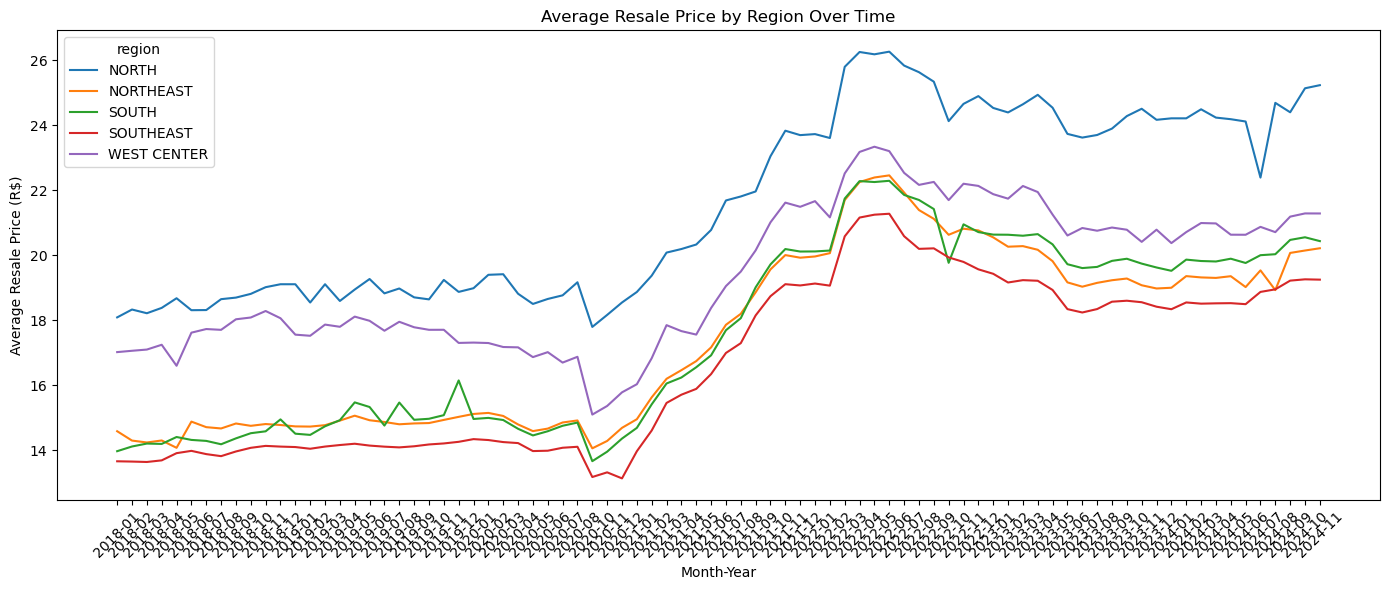

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is in datetime format and extract year-month for grouping
df['start_date'] = pd.to_datetime(df['start_date'])  # ou 'START DATE' se você não renomeou ainda
df['year_month'] = df['start_date'].dt.to_period('M').astype(str)

# Agrupar por região e mês
region_trend = df.groupby(['year_month', 'region'])['average_resale_price'].mean().reset_index()

# Gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=region_trend, x='year_month', y='average_resale_price', hue='region')
plt.xticks(rotation=45)
plt.title('Average Resale Price by Region Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Resale Price (R$)')
plt.tight_layout()
plt.show()

 This graph shows the differences in price behavior between Brazilian regions over time.

### 2. Boxplot of prices by fuel type

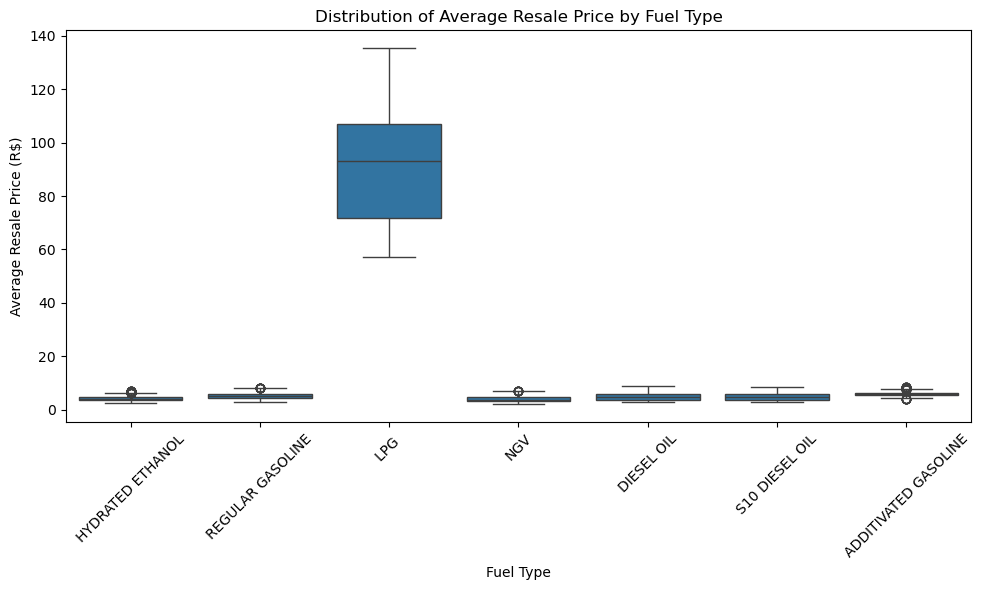

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='average_resale_price')
plt.title('Distribution of Average Resale Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Resale Price (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This boxplot helps to identify which types of fuel have the greatest variability or median price.

### 3. Boxplot by top 10 states with most records

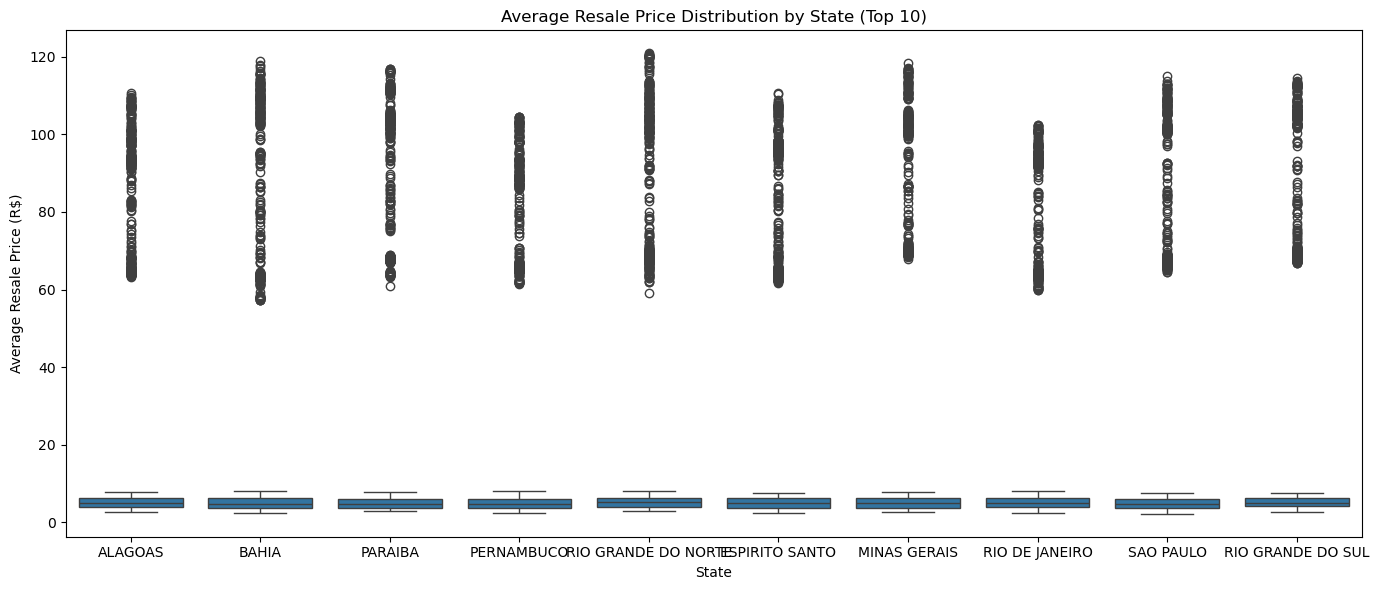

In [37]:
plt.figure(figsize=(14, 6))

# Filter for top 10 most frequent states
top_states = df['state'].value_counts().head(10).index
filtered_df = df[df['state'].isin(top_states)]

# Boxplot
sns.boxplot(data=filtered_df, x='state', y='average_resale_price')
plt.title('Average Resale Price Distribution by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Resale Price (R$)')
plt.tight_layout()
plt.show()

## Key Insights

- Fuel prices exhibit regional differences, with the Southeast and South generally showing higher average values.
- Among fuel types, GNV and Diesel tend to have lower resale price medians compared to Gasoline and Ethanol.
- The price distribution varies across states, indicating potential influence from local policies, distribution logistics, and market dynamics.

### 1. Correlation Matrix (Numerical Columns)

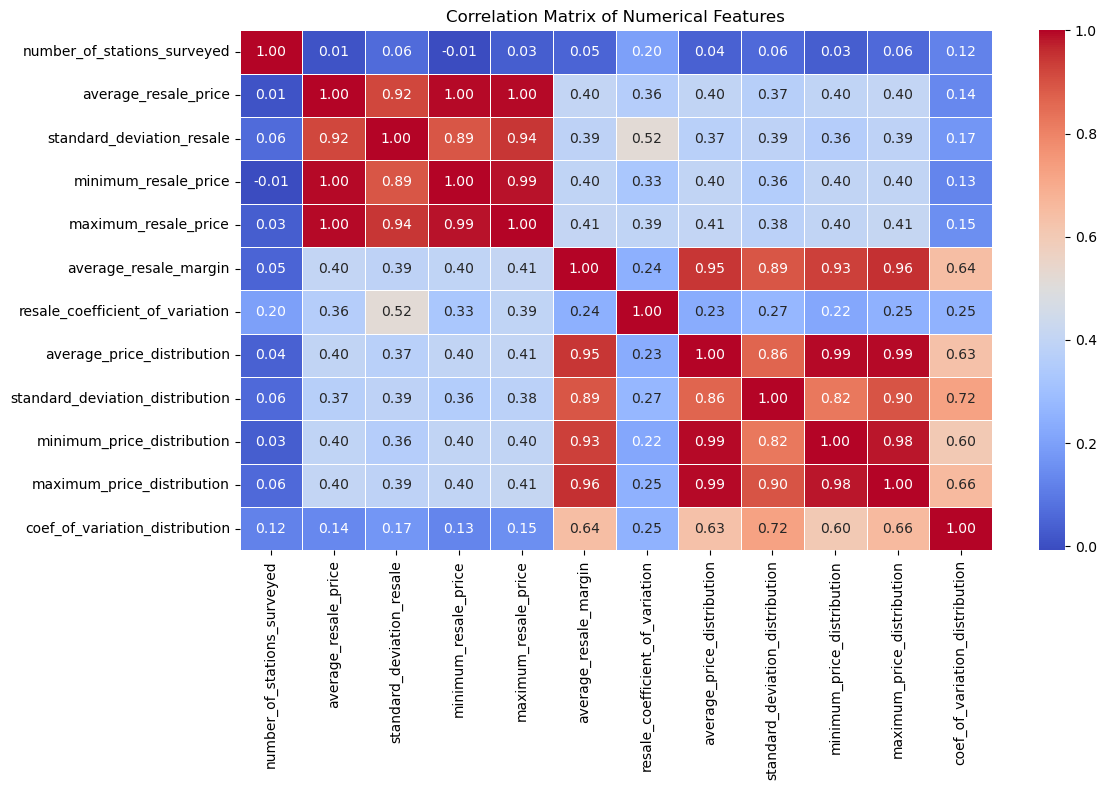

In [38]:
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

This heatmap reveals which numerical features are most correlated with fuel prices and with each other. Useful for feature selection and interpretation.

### 2. Trend of Average Fuel Prices by Product

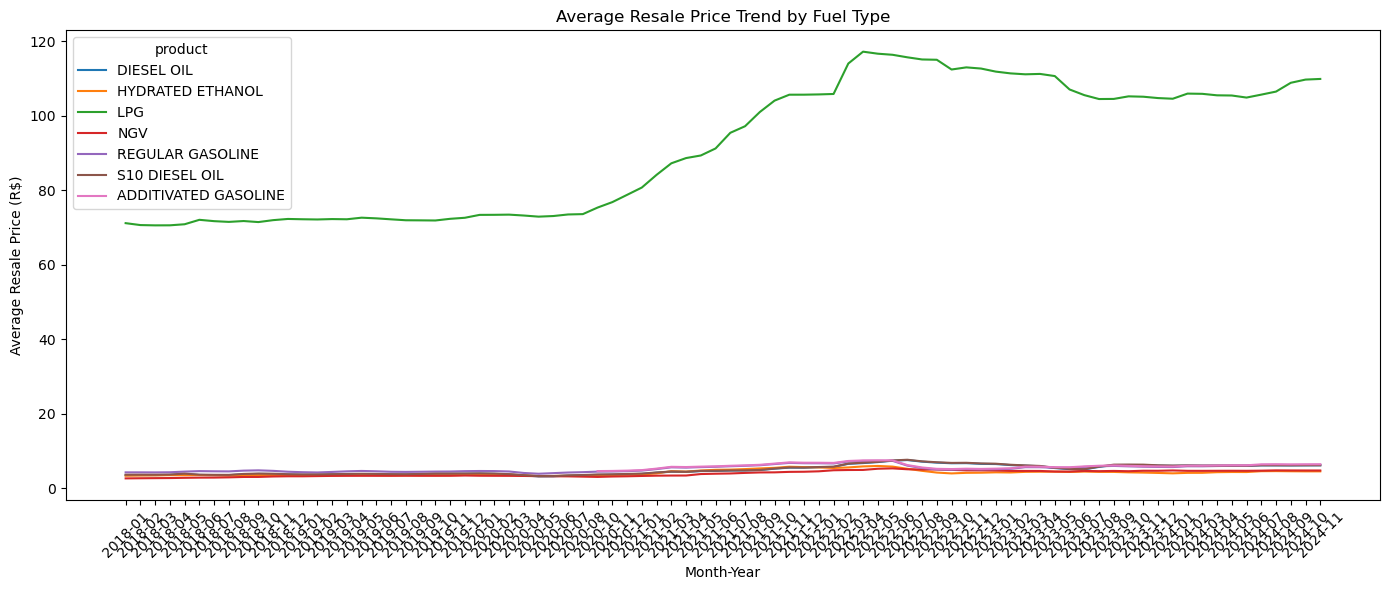

In [39]:
# Group by month and product
product_trend = df.groupby(['year_month', 'product'])['average_resale_price'].mean().reset_index()

# Line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=product_trend, x='year_month', y='average_resale_price', hue='product')
plt.title('Average Resale Price Trend by Fuel Type')
plt.xlabel('Month-Year')
plt.ylabel('Average Resale Price (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows how different fuel types behave over time, helping to identify trends, volatility, and seasonality.

### 3. Time Series Decomposition (for a Specific Region)

In [40]:
# Filter and group by region and month
region_data = df[df['region'] == 'SOUTHEAST']
region_monthly = region_data.groupby('year_month')['average_resale_price'].mean()

# Convert index to datetime and sort
region_monthly.index = pd.to_datetime(region_monthly.index)
region_monthly = region_monthly.sort_index()

# Display number of observations
print(f"Number of monthly observations for SOUTHEAST: {region_monthly.shape[0]}")
print(region_monthly.head())


Number of monthly observations for SOUTHEAST: 82
year_month
2018-01-01   13.66
2018-02-01   13.65
2018-03-01   13.64
2018-04-01   13.69
2018-05-01   13.91
Name: average_resale_price, dtype: float64


<Figure size 1200x1000 with 0 Axes>

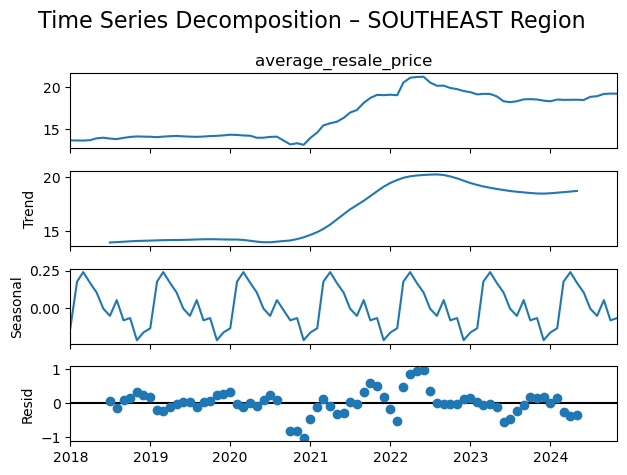

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposition with fixed period of 12 (monthly data = annual seasonality)
decomp = seasonal_decompose(region_monthly, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))
decomp.plot()
plt.suptitle('Time Series Decomposition – SOUTHEAST Region', fontsize=16)
plt.tight_layout()
plt.show()

This decomposition breaks the price trend into trend, seasonal, and residual components, helping to understand periodic fluctuations in a given region

## Station Coverage by State

The chart above shows the total number of fuel stations surveyed per state over the entire data period. This information is useful to assess the robustness and reliability of the data by location. States with fewer surveyed stations may exhibit greater price volatility or less representative averages.

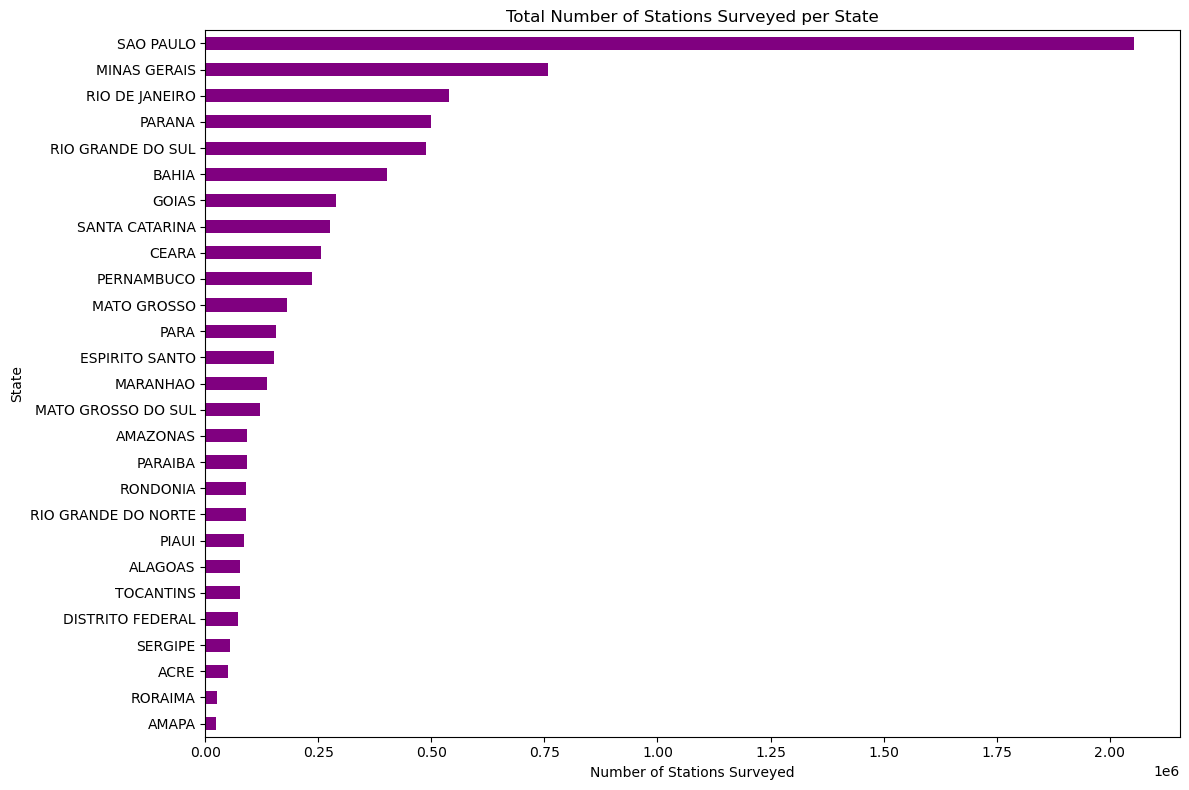

In [42]:
# Bar plot: total number of surveyed stations per state
stations_per_state = df.groupby('state')['number_of_stations_surveyed'].sum().sort_values()

plt.figure(figsize=(12, 8))
stations_per_state.plot(kind='barh', color='purple')
plt.title('Total Number of Stations Surveyed per State')
plt.xlabel('Number of Stations Surveyed')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Choropleth Map – Total Stations Surveyed per State

In [53]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoDataFrame with Brazilian states
gdf = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Check how state names are stored
print(gdf.columns)
print(gdf.head(3))

Index(['id', 'name', 'sigla', 'regiao_id', 'codigo_ibg', 'cartodb_id',
       'created_at', 'updated_at', 'geometry'],
      dtype='object')
   id      name sigla regiao_id codigo_ibg  cartodb_id  \
0   1      Acre    AC         3         12           1   
1   2   Alagoas    AL         4         27           2   
2   3  Amazonas    AM         3         13           3   

                 created_at                updated_at  \
0 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
1 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
2 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   

                                            geometry  
0  MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...  
1  MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...  
2  MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...  


In [54]:
# Ensure both columns are of string type
gdf['state_code'] = gdf['sigla'].astype(str)
stations_df['state_code'] = stations_df['state_code'].astype(str)

# Now merge
merged = gdf.merge(stations_df, on='state_code')

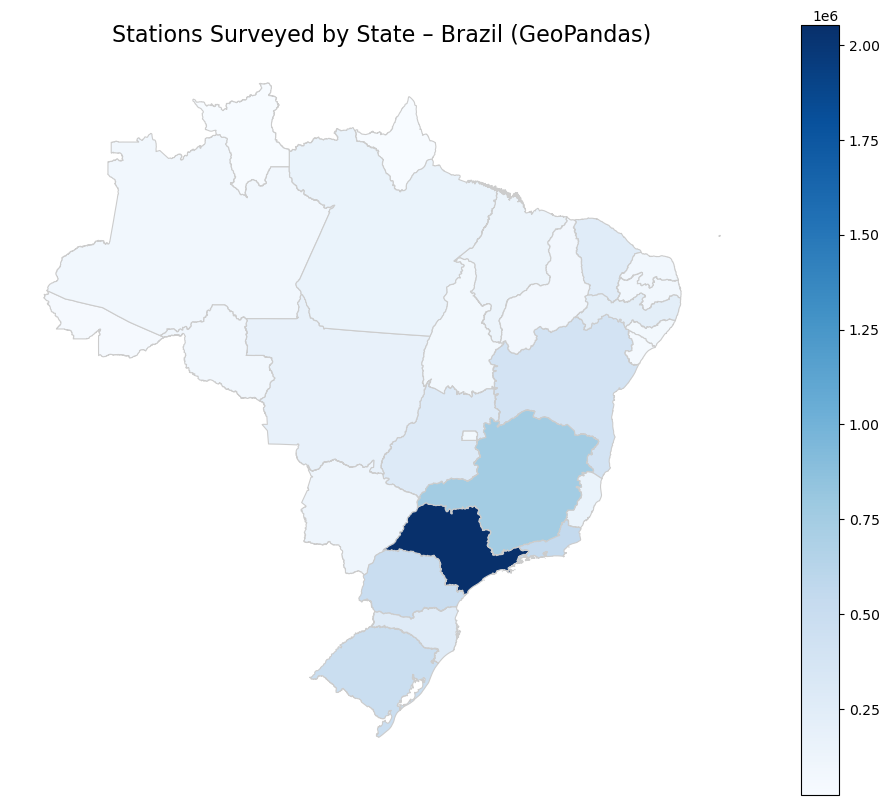

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='number_of_stations_surveyed',
            cmap='Blues',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True)

ax.set_title('Stations Surveyed by State – Brazil (GeoPandas)', fontdict={'fontsize': 16})
ax.axis('off')
plt.show()


### Stations per State Normalized by Area or Population

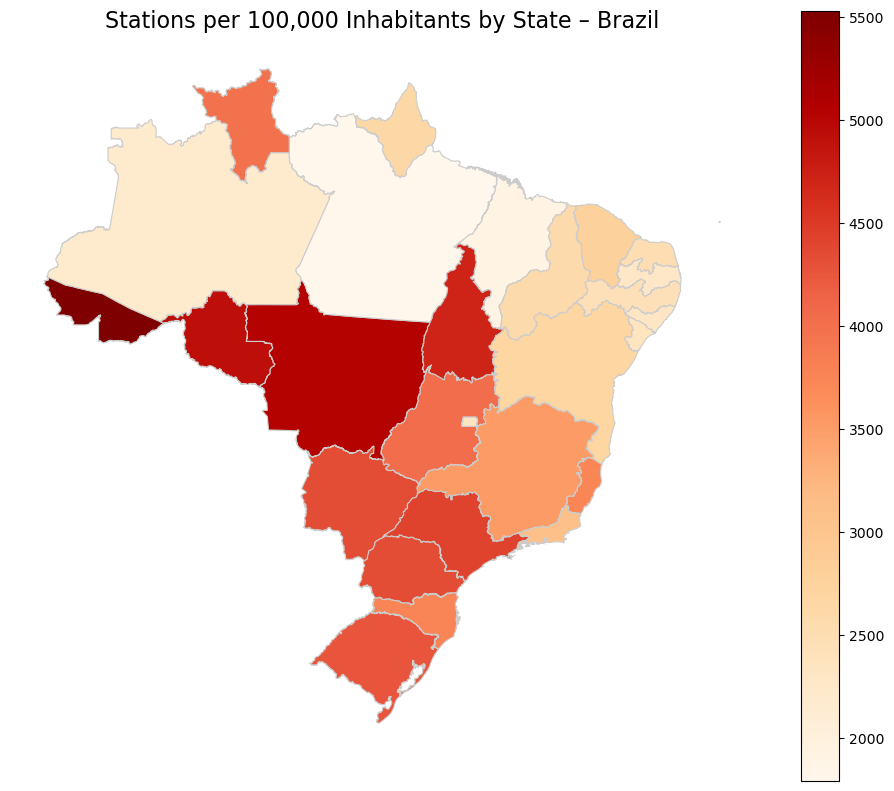

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Estimated population per state (UF code)
state_population = {
    'AC': 894000, 'AL': 3353000, 'AP': 877000, 'AM': 4200000, 'BA': 14930000,
    'CE': 9242000, 'DF': 3094000, 'ES': 4064000, 'GO': 7200000, 'MA': 7075000,
    'MT': 3567000, 'MS': 2800000, 'MG': 21460000, 'PA': 8691000, 'PB': 4030000,
    'PR': 11520000, 'PE': 9675000, 'PI': 3281000, 'RJ': 17460000, 'RN': 3534000,
    'RS': 11440000, 'RO': 1815000, 'RR': 652000, 'SC': 7331000, 'SP': 46350000,
    'SE': 2327000, 'TO': 1607000
}

# Step 1: Aggregate total stations surveyed by state
stations_per_state = df.groupby('state_code')['number_of_stations_surveyed'].sum().reset_index()

# Step 2: Add population and compute stations per 100k inhabitants
stations_per_state['population'] = stations_per_state['state_code'].map(state_population)
stations_per_state['stations_per_100k'] = (stations_per_state['number_of_stations_surveyed'] / stations_per_state['population']) * 100000

# Step 3: Load GeoJSON for Brazilian states
gdf = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Step 4: Prepare merge keys and join spatial with statistical data
gdf['state_code'] = gdf['sigla'].astype(str)
stations_per_state['state_code'] = stations_per_state['state_code'].astype(str)
merged = gdf.merge(stations_per_state, on='state_code')

# Step 5: Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='stations_per_100k',
            cmap='OrRd',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True)

ax.set_title('Stations per 100,000 Inhabitants by State – Brazil', fontdict={'fontsize': 16})
ax.axis('off')
plt.show()

## Stations per 100,000 Inhabitants

This choropleth map shows the number of fuel stations surveyed per 100,000 inhabitants in each Brazilian state. By normalizing by population, this visualization reveals which states are potentially over- or underrepresented in the dataset:

- States like **Distrito Federal** and **Roraima** appear to have higher per-capita survey coverage.
- Densely populated states such as **Bahia** and **Pará** exhibit lower relative values, indicating possible under-sampling.

This type of normalization is important for ensuring fairness and consistency when interpreting trends or building models based on regionally imbalanced data.

## Key Insights from Exploratory Data Analysis (EDA)

The exploratory analysis of fuel price data across Brazilian states and regions provided several important findings:

1. **Regional Price Variation**  
   Fuel prices vary significantly between regions. The Southeast and South regions tend to show higher average prices, while the North and Northeast regions typically display lower prices. This may be linked to distribution costs, infrastructure availability, and tax policies.

2. **Temporal Trends and Seasonality**  
   The line plots by fuel type and region reveal clear temporal trends. Certain fuels, such as gasoline and ethanol, show consistent price increases over the years, with visible seasonal peaks and dips. The time series decomposition confirmed strong seasonal components in regions like the Southeast.

3. **Differences by Fuel Type**  
   Boxplots indicate that diesel and GNV (natural gas) generally have lower resale prices than gasoline and ethanol. Additionally, the variance in prices for ethanol is notably higher, suggesting it may be more sensitive to external factors like agricultural production or subsidies.

4. **Survey Coverage by State**  
   Mapping the total number of stations surveyed shows that economically larger states like São Paulo, Minas Gerais, and Rio de Janeiro have the most survey entries. However, when normalized by population, smaller states such as Roraima and the Federal District demonstrate higher per-capita coverage.

5. **Potential Bias in Data Collection**  
   The normalization map revealed imbalances in data representation. Some highly populated states appear to be underrepresented in terms of surveys per inhabitant. This insight is crucial for understanding the limitations of the dataset and the importance of weighting in predictive models.

These insights help define key features for modeling, support strategic recommendations, and highlight areas where policy or data collection efforts could be improved.

# 7. Data Preprocessing

In this step, we prepare the dataset for modeling by cleaning and transforming variables. We:
- Standardize column names
- Convert date formats
- Create time-based features
- Encode categorical variables

### Clean and standardize column names

In [60]:
# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

### Convert date and create time features

In [61]:
# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Create time-based features
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['month_year'] = df['start_date'].dt.to_period('M').astype(str)

### Check categorical columns

In [62]:
# Preview unique values for potential encoding
print("Region:", df['region'].unique())
print("State:", df['state'].unique())
print("Product:", df['product'].unique())

Region: ['WEST CENTER' 'NORTHEAST' 'NORTH' 'SOUTHEAST' 'SOUTH']
State: ['DISTRITO FEDERAL' 'GOIAS' 'MATO GROSSO' 'MATO GROSSO DO SUL' 'ALAGOAS'
 'BAHIA' 'CEARA' 'MARANHAO' 'PARAIBA' 'PERNAMBUCO' 'PIAUI'
 'RIO GRANDE DO NORTE' 'SERGIPE' 'ACRE' 'AMAPA' 'AMAZONAS' 'PARA'
 'RONDONIA' 'RORAIMA' 'TOCANTINS' 'ESPIRITO SANTO' 'MINAS GERAIS'
 'RIO DE JANEIRO' 'SAO PAULO' 'PARANA' 'RIO GRANDE DO SUL'
 'SANTA CATARINA']
Product: ['HYDRATED ETHANOL' 'REGULAR GASOLINE' 'LPG ' 'NGV' 'DIESEL OIL'
 'S10 DIESEL OIL' 'ADDITIVATED GASOLINE']


### Encode categorical variables (One-Hot Encoding)

In [63]:
# One-hot encode region and product for modeling
df_encoded = pd.get_dummies(df, columns=['region', 'product'], drop_first=True)

I now have a clean and structured dataset, with date features extracted and categorical variables encoded. It is ready for machine learning models in the next section.